<a href="https://colab.research.google.com/github/kite121/Machine-Learning-Course/blob/main/Lab_5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Self‑Practice: PCA for Dimensionality Reduction

## Learning goals
1. Load and prepare the digits dataset for PCA.
2. Compute and interpret **explained variance ratio** and **cumulative explained variance**.
3. Train a model with different number of principal components and compare results.


## Dataset choice

We will use the **Digits** dataset (`sklearn.datasets.load_digits`):
- **Samples:** 1797 images of handwritten digits (0–9)
- **Features:** 64 (an 8×8 image flattened into a vector)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For reproducibility
RANDOM_STATE = 42


## Task 1 — Load the dataset and create a train/test split


In [3]:
# Load the dataset
digits = load_digits()

# Features and labels
X = digits.data
y = digits.target

# TODO: Split the data into 80% for training and 20% for testing
# Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1437, 64)
Test shape: (360, 64)



## Task 2 — Fit PCA and analyze explained variance

You must:
1. Standardize the data (important for PCA).
2. Fit a PCA model **on the training set only** (use `n_components=None` to compute all components).
3. Plot:
   - The **explained variance ratio** for each component (a "scree plot").
   - The **cumulative explained variance**.
4. Compute the **minimum number of components** needed to reach:
   - 90% explained variance
   - 95% explained variance

**Tip:** Use `np.cumsum(...)`.


k for 90% variance: 31
k for 95% variance: 40


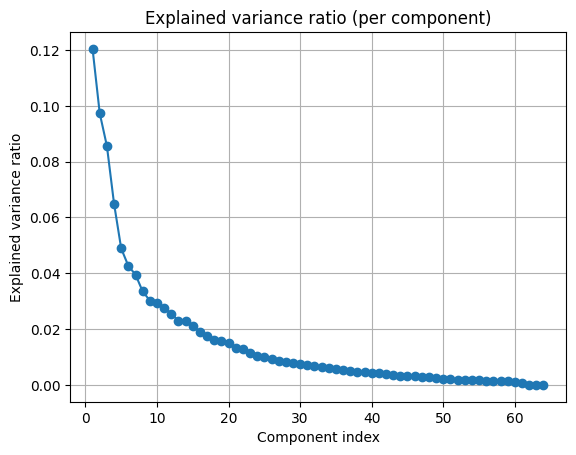

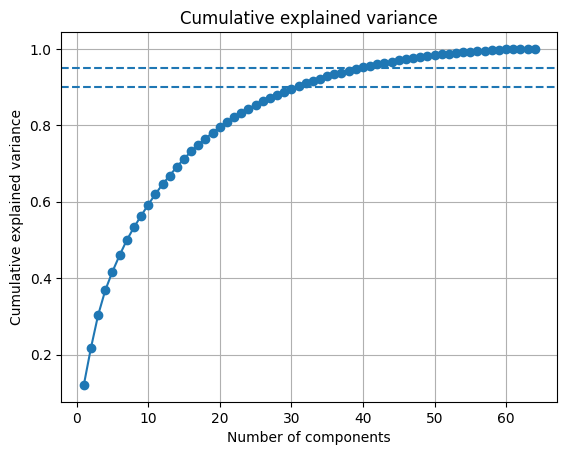

In [4]:
# TODO: Standardize the data (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Fit PCA using all components on the scaled training data
pca_full = PCA(n_components=None)
pca_full.fit(X_train_scaled)

# Explained variance ratio and cumulative explained variance
evr = pca_full.explained_variance_ratio_
cum_evr = np.cumsum(evr)

# Smallest k achieving 90% and 95% explained variance
k_90 = int(np.searchsorted(cum_evr, 0.90) + 1)
k_95 = int(np.searchsorted(cum_evr, 0.95) + 1)

print("k for 90% variance:", k_90)
print("k for 95% variance:", k_95)

# Scree plot (explained variance ratio)
plt.figure()
plt.plot(np.arange(1, len(evr) + 1), evr, marker="o")
plt.title("Explained variance ratio (per component)")
plt.xlabel("Component index")
plt.ylabel("Explained variance ratio")
plt.grid(True)
plt.show()

# Cumulative explained variance plot
plt.figure()
plt.plot(np.arange(1, len(cum_evr) + 1), cum_evr, marker="o")
plt.axhline(0.90, linestyle="--")
plt.axhline(0.95, linestyle="--")
plt.title("Cumulative explained variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()



## Task 3 — Train a classifier with different numbers of components

You will compare a **baseline model** (no PCA) vs. PCA with `n_components ∈ {30, 50, 60, 64}`.

Model:
- Use `LogisticRegression(max_iter=2000)`

Pipeline:
- Baseline: `StandardScaler()` → `LogisticRegression(...)`
- PCA version: `StandardScaler()` → `PCA(n_components=k)` → `LogisticRegression(...)`

**What to do**
1. Train the baseline model and compute test accuracy.
2. For each k in `[30, 50, 60, 64]`:
   - Train the PCA pipeline
   - Evaluate test accuracy
3. Store results in a DataFrame and print it.


In [11]:
# Baseline pipeline (no PCA)
baseline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=2000))
])

#TODO: Fit the pipeline and get predictions (2 lines)
baseline.fit(X_train, y_train)
baseline_pred = baseline.predict(X_test)

baseline_acc = accuracy_score(y_test, baseline_pred)
print("Baseline accuracy:", baseline_acc)

ks = [31, 40, 50, 60, 64]
results = []

for k in ks:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=k)),
        ("classifier", LogisticRegression(max_iter = 2000))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"n_components": k, "test_accuracy": acc})

results_df = pd.DataFrame(results).sort_values("n_components")
results_df


Baseline accuracy: 0.9722222222222222


,n_components,test_accuracy
0,31,0.963889
1,40,0.961111
2,50,0.972222
3,60,0.972222
4,64,0.972222



## Task 4 — Describe the main observations you noticed from the results of the previous experiment


We can see that the accuracy does not increse even if we lower dimension. We have the same result as the baseline model starting from 50 principal components, but we can reach good enough result even with 10 principal components (~~ 0.88 acc), but we do not increase result which means our data has small noice and almost each component is useful. To reach the baseline result, we  need to cover (~~ 97% of initial variance).